In [76]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [77]:
import pandas as pd 
import numpy as np
import datetime


In [78]:
df = pd.read_csv("C:/Users/Saambavi/Downloads/Copper_Set.xlsx - Result 1.csv")

C:\Users\Saambavi\AppData\Local\Temp\ipykernel_17340\4288215160.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Saambavi/Downloads/Copper_Set.xlsx - Result 1.csv")


In [79]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00


In [82]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [83]:
df.drop('id', axis=1, inplace=True)  # Modifies df directly


In [84]:
columns_to_check = ['item_date', 'customer', 'country', 
                    'status', 'application', 'thickness',  
                     'delivery date', 'selling_price']  # Excluding 'material_ref'

df.dropna(subset=columns_to_check, inplace=True)


In [85]:
df.shape

(181638, 13)

In [86]:
df['material_ref'].nunique()


16563

In [87]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(10)
     

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,NaN,1668701718,20210401.0,983.00
6,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00
7,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,NaN,611993,20210101.0,931.00
8,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,NaN,1668701376,20210701.0,1363.00
9,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,NaN,1668701718,20210401.0,983.00


In [88]:
df.isnull().sum()

item_date             0
quantity tons         0
customer              0
country               0
status                0
item type             0
application           0
thickness             0
width                 0
material_ref     100613
product_ref           0
delivery date         0
selling_price         0
dtype: int64

In [89]:

# material ref have more than 55% are null values so we have drop column.

df.drop(columns=['material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181669,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181670,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181671,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [90]:
# Function to handle invalid dates
def safe_date_parse(date):
    try:
        return pd.to_datetime(date, format='%Y%m%d')
    except ValueError:
        return pd.NaT  # Assign NaT (Not a Time) for invalid dates

# Apply safe_date_parse to the 'item_date' column
df['item_date'] = df['item_date'].apply(safe_date_parse)

In [91]:

# Convert to datetime format
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')


In [92]:
# Extract day, month, and year from 'item_date'
df['item_date_day'] = pd.to_datetime(df['item_date']).dt.day
df['item_date_month'] = pd.to_datetime(df['item_date']).dt.month
df['item_date_year'] = pd.to_datetime(df['item_date']).dt.year

# Extract day, month, and year from 'delivery date'
df['delivery_date_day'] = pd.to_datetime(df['delivery date']).dt.day
df['delivery_date_month'] = pd.to_datetime(df['delivery date']).dt.month
df['delivery_date_year'] = pd.to_datetime(df['delivery date']).dt.year


In [93]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [94]:
df.drop(columns=['item_date', 'delivery date'], inplace=True)


In [95]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_date_day', 'item_date_month', 'item_date_year',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [96]:
df.head(10)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,1.0,4.0,2021.0,1.0,7.0,2021.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,1.0,4.0,2021.0,1.0,4.0,2021.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,1.0,4.0,2021.0,1.0,1.0,2021.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,1.0,4.0,2021.0,1.0,1.0,2021.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,1.0,4.0,2021.0,1.0,3.0,2021.0
5,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,983.00,1.0,4.0,2021.0,1.0,4.0,2021.0
6,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,18.00,1.0,4.0,2021.0,1.0,7.0,2021.0
7,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,611993,931.00,1.0,4.0,2021.0,1.0,1.0,2021.0
8,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.00,1.0,4.0,2021.0,1.0,7.0,2021.0
9,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,1668701718,983.00,1.0,4.0,2021.0,1.0,4.0,2021.0


In [97]:
# Convert year, month, and day to integers to remove decimals
df['item_date_year'] = df['item_date_year'].astype('Int64')
df['item_date_month'] = df['item_date_month'].astype('Int64')
df['item_date_day'] = df['item_date_day'].astype('Int64') 

df['delivery_date_year'] = df['delivery_date_year'].astype('Int64')
df['delivery_date_month'] = df['delivery_date_month'].astype('Int64')
df['delivery_date_day'] = df['delivery_date_day'].astype('Int64') 



In [98]:
df.dtypes

quantity tons           object
customer               float64
country                float64
status                  object
item type               object
application            float64
thickness              float64
width                  float64
product_ref              int64
selling_price          float64
item_date_day            Int64
item_date_month          Int64
item_date_year           Int64
delivery_date_day        Int64
delivery_date_month      Int64
delivery_date_year       Int64
dtype: object

In [99]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')  # Convert with NaN for non-numeric values
non_numeric_values = df[df['quantity tons'].isna()]  # Find non-numeric rows
print(non_numeric_values)


        quantity tons    customer  country status item type  application  \
173086            NaN  30157111.0     78.0    Won         W         41.0   

        thickness   width  product_ref  selling_price  item_date_day  \
173086        0.5  1000.0    164141591          672.0             14   

        item_date_month  item_date_year  delivery_date_day  \
173086                7            2020                  1   

        delivery_date_month  delivery_date_year  
173086                    8                2020  


In [100]:
df1 = df.dropna(subset=['quantity tons']).reset_index(drop=True)


In [101]:
df1['quantity tons'] = df1['quantity tons'].astype('float64')

In [102]:
print(df1.isna().sum())

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          2
item_date_month        2
item_date_year         2
delivery_date_day      2
delivery_date_month    2
delivery_date_year     2
dtype: int64


In [103]:
df1 = df1.dropna(subset=['item_date_day', 'item_date_month', 'item_date_year',
                        'delivery_date_day', 'delivery_date_month', 'delivery_date_year']).reset_index(drop=True)


In [104]:
df1['quantity tons'].isnull().sum()

np.int64(0)

In [105]:
df1.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_date_day', 'item_date_month', 'item_date_year',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [106]:
pip install matplotlib

In [107]:
pip install seaborn;

Outlier counts per column:
quantity tons: 20950
customer: 1607
country: 0
application: 146
thickness: 13947
width: 10948
product_ref: 0
selling_price: 4858


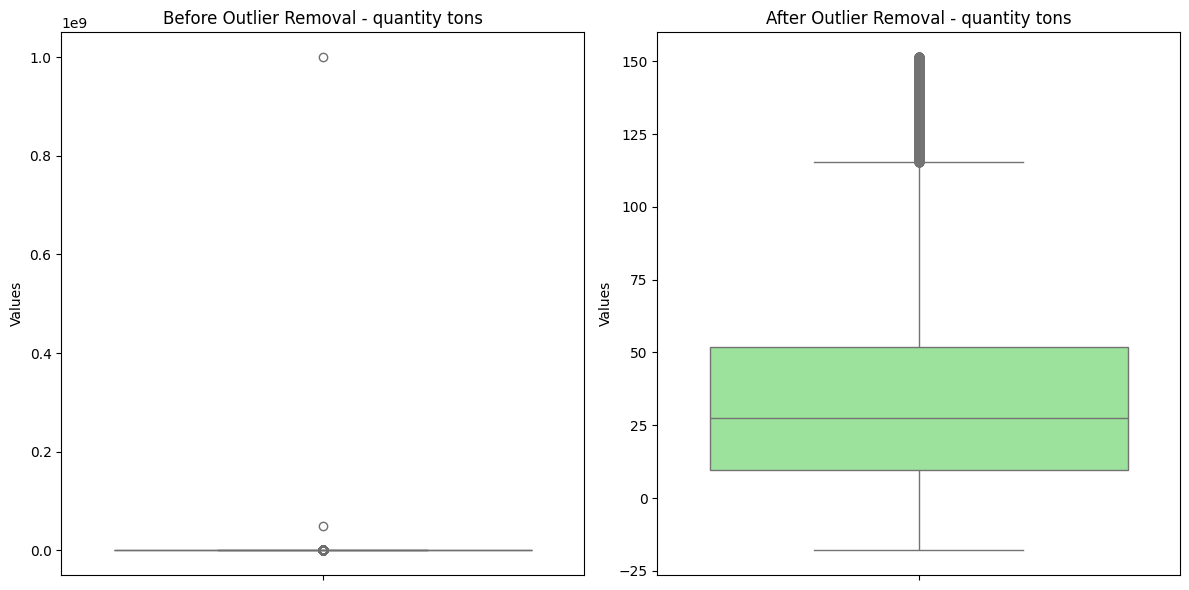

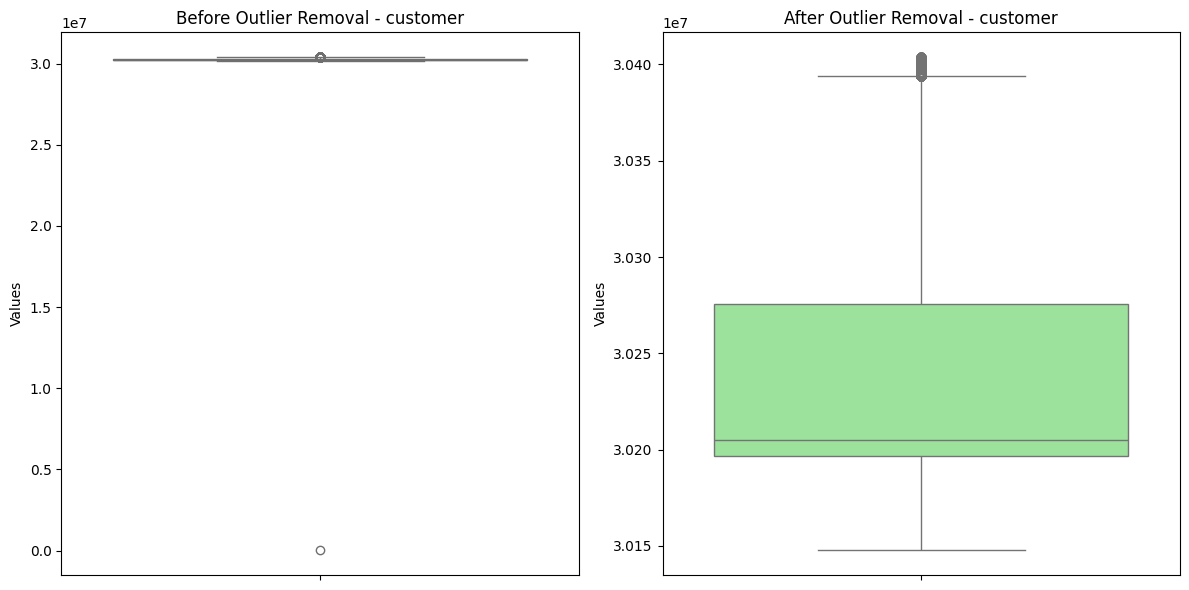

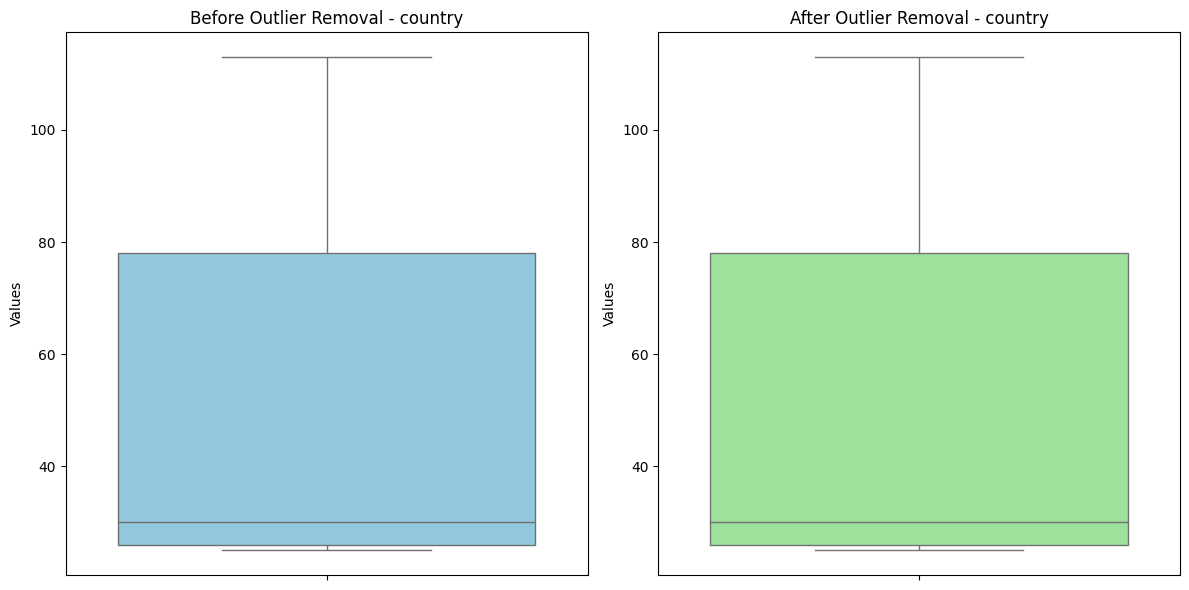

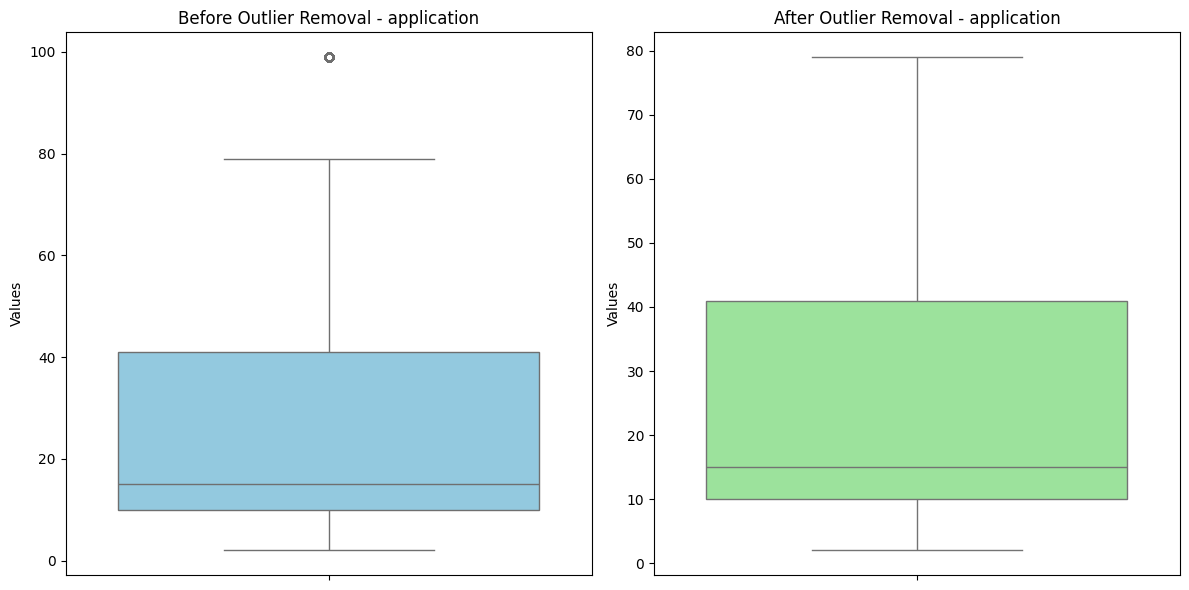

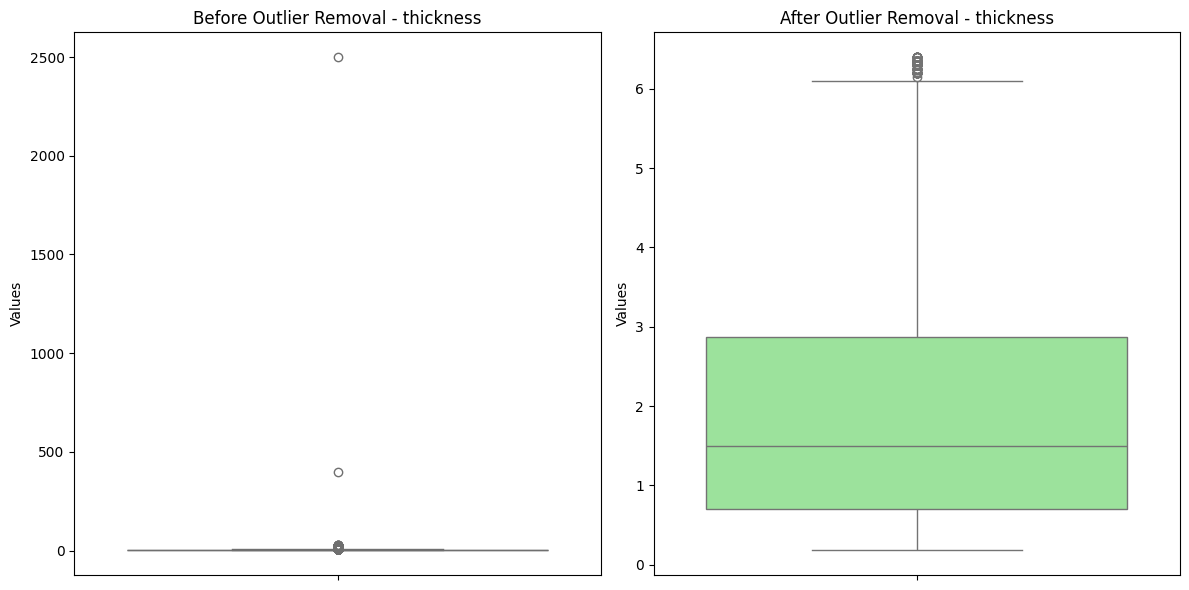

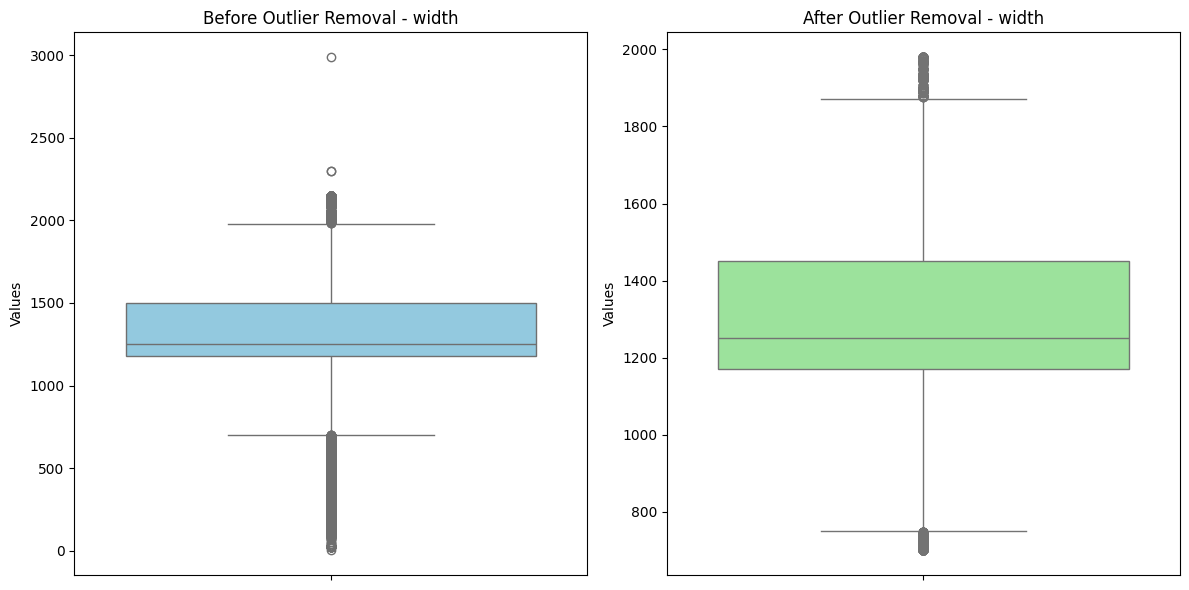

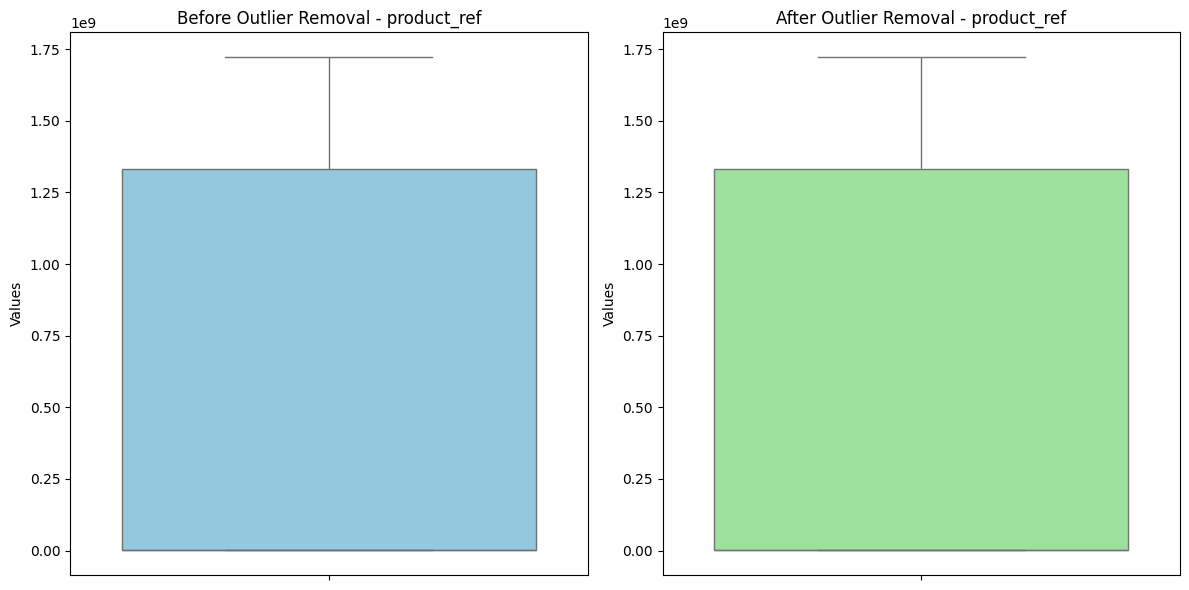

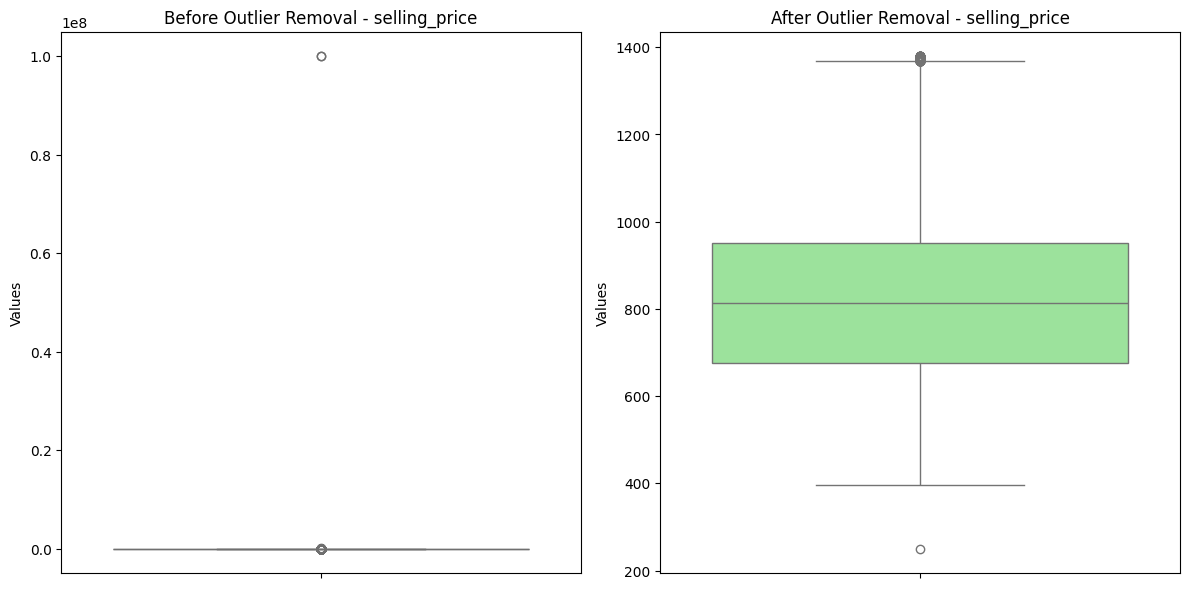

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def detect_outliers_iqr(df1, column):
    Q1 = df1[column].quantile(0.25)  # First quartile
    Q3 = df1[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
    return outliers

# Select numerical columns
numerical_columns = ['quantity tons', 'customer', 'country',
                     'application', 'thickness', 'width', 'product_ref', 'selling_price']

# Detect outliers for each numerical column
outlier_counts = {col: len(detect_outliers_iqr(df1, col)) for col in numerical_columns}

# Print outlier count for each column
print("Outlier counts per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Function to remove outliers
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column[(column >= lower_bound) & (column <= upper_bound)]

# Create a cleaned copy of the DataFrame
df_cleaned = df1.copy()
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(remove_outliers)

# Plot box plots before and after outlier removal
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Before outlier removal
    sns.boxplot(data=df1[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Before Outlier Removal - {col}')
    axes[0].set_ylabel('Values')

    # After outlier removal
    sns.boxplot(data=df_cleaned[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'After Outlier Removal - {col}')
    axes[1].set_ylabel('Values')

    plt.tight_layout()
    plt.show()


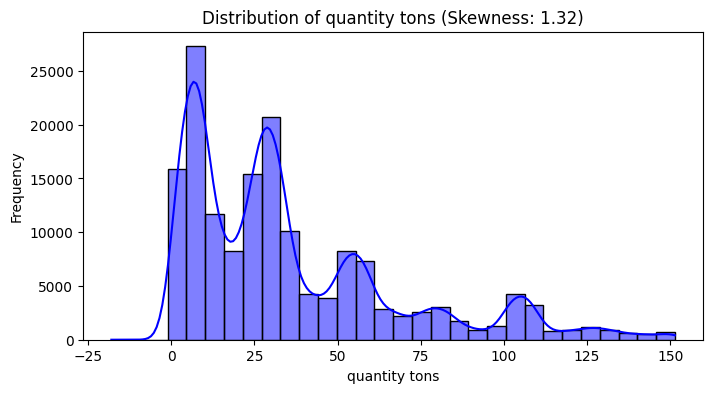

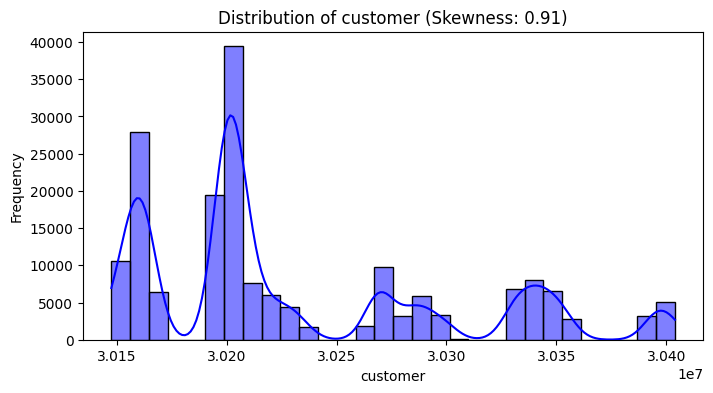

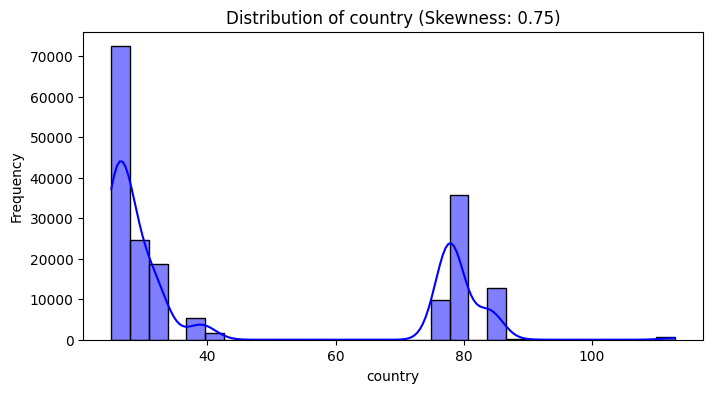

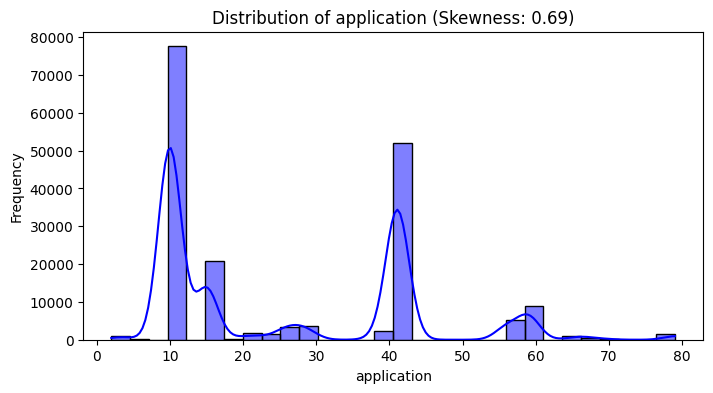

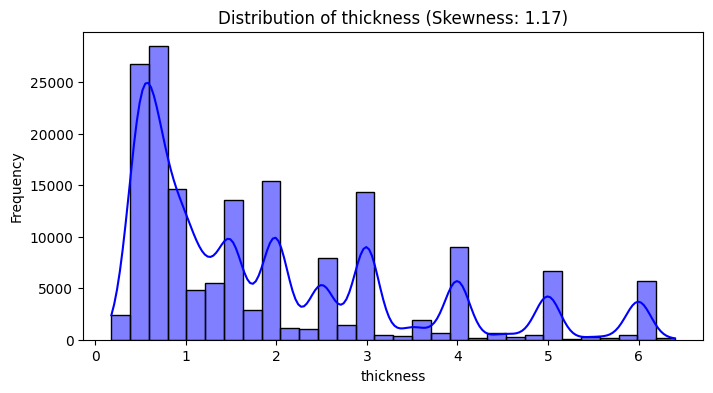

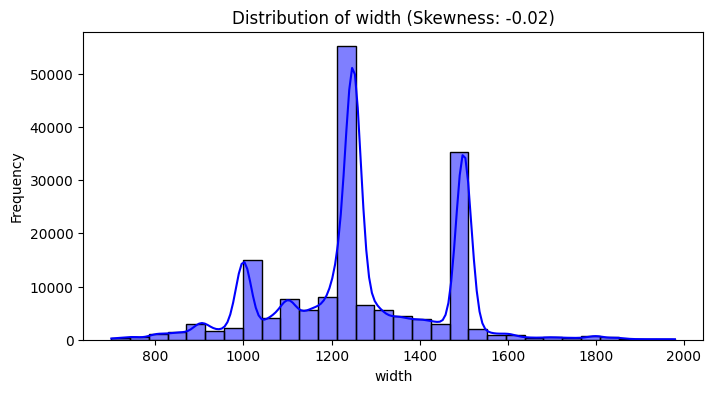

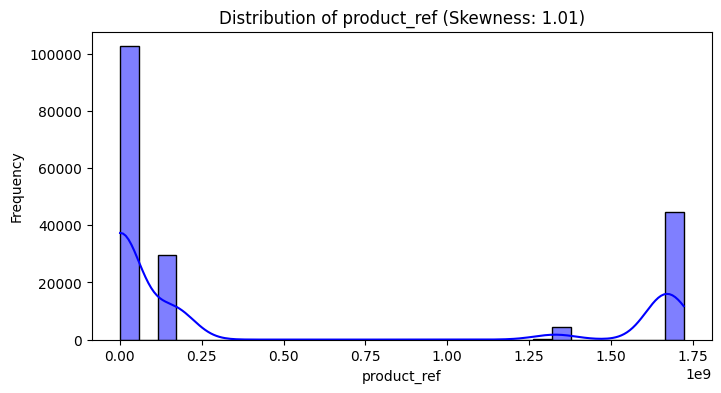

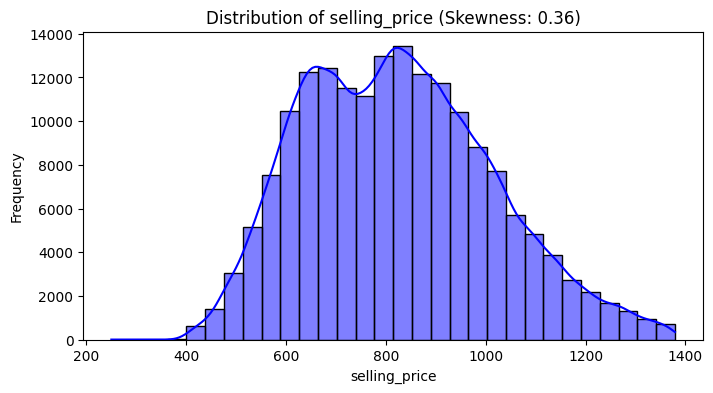

Skewness values for numerical columns:
 quantity tons    1.316458
customer         0.906708
country          0.753601
application      0.691323
thickness        1.167886
width           -0.019724
product_ref      1.015000
selling_price    0.360614
dtype: float64


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns
numerical_columns = ['quantity tons', 'customer', 'country',
       'application', 'thickness', 'width', 'product_ref', 'selling_price']

# Calculate skewness for all numerical columns
skewness_values = df_cleaned[numerical_columns].skew()

# Plot histograms with skewness value in title
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    
    # Plot histogram and KDE (Kernel Density Estimate)
    sns.histplot(df_cleaned[col], kde=True, color='blue', bins=30)
    
    # Get the skewness value for the column
    skewness = skewness_values[col]
    
    # Title with skewness value
    plt.title(f'Distribution of {col} (Skewness: {skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.show()

# Print the skewness values for all numerical columns
print("Skewness values for numerical columns:\n", skewness_values)


In [110]:
import numpy as np

# List of columns to apply log transformation
skewed_cols = ['customer', 'country', 'application', 'product_ref', 'quantity tons', 'thickness']

# Apply log1p transformation
df_cleaned[skewed_cols] = df_cleaned[skewed_cols].apply(np.log1p)


In [111]:
df_cleaned.isnull().sum()

quantity tons          20953
customer                1607
country                    0
status                     0
item type                  0
application              146
thickness              13947
width                  10948
product_ref                0
selling_price           4858
item_date_day              0
item_date_month            0
item_date_year             0
delivery_date_day          0
delivery_date_month        0
delivery_date_year         0
dtype: int64

In [112]:
df_cleaned.dropna(subset=['quantity tons', 'customer', 'application', 'thickness','width','selling_price'], inplace=True)


Correlation matrix:
                     quantity tons  customer   country  application  \
quantity tons             1.000000  0.132896 -0.083177     0.030068   
customer                  0.132896  1.000000  0.090717    -0.035289   
country                  -0.083177  0.090717  1.000000    -0.033302   
application               0.030068 -0.035289 -0.033302     1.000000   
thickness                 0.048088  0.077193 -0.089113    -0.196500   
width                     0.057754  0.024518  0.014267    -0.112376   
product_ref               0.053917 -0.038306 -0.034845    -0.213333   
selling_price            -0.046588  0.005058 -0.018755     0.201389   
item_date_day             0.044255  0.010741 -0.065467    -0.002804   
item_date_month           0.007932 -0.011059  0.031436     0.018983   
item_date_year           -0.022302  0.009239 -0.026404    -0.012879   
delivery_date_day              NaN       NaN       NaN          NaN   
delivery_date_month       0.005594 -0.027855  0.038526   

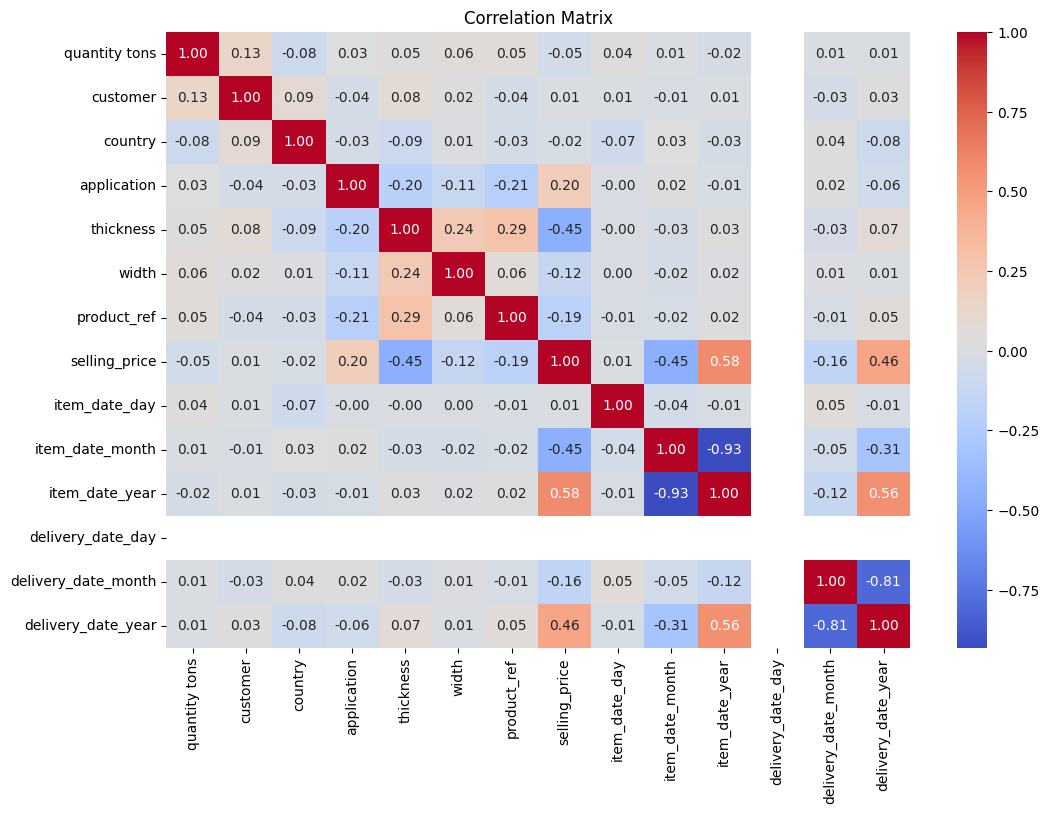

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame with cleaned data
# Calculate the correlation matrix for numerical columns
correlation_matrix = df_cleaned.select_dtypes(include=['Int64','Float64']).corr()


# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [114]:
df_cleaned.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_date_day', 'item_date_month', 'item_date_year',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [115]:
!python -m pip install --upgrade pip


In [116]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [117]:
df_cleaned.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_date_day', 'item_date_month', 'item_date_year',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [119]:
# Filter the DataFrame to include only rows where 'status' is 'Won' or 'Lost'
df_cleaned = df_cleaned[df_cleaned['status'].isin(['Won', 'Lost'])]


In [120]:
df_cleaned.head(15)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,4.010077,17.221905,3.367296,Won,W,2.397895,1.098612,1500.0,21.236568,854.00,1,4,2021,1,7,2021
7,4.739589,17.228050,3.496508,Won,W,3.737670,0.518794,1220.0,13.324478,931.00,1,4,2021,1,1,2021
8,4.249521,17.228025,3.663562,Won,S,2.397895,0.470004,1275.0,21.235312,1363.00,1,4,2021,1,7,2021
11,4.744894,17.228050,3.496508,Won,W,3.737670,0.438255,1220.0,13.324478,954.00,1,4,2021,1,1,2021
12,3.350344,17.222210,4.369448,Won,W,2.397895,0.559616,1250.0,18.916240,1098.00,1,4,2021,1,7,2021
13,3.503613,17.223431,3.332205,Won,S,2.397895,0.470004,1010.0,13.350897,973.00,1,4,2021,1,7,2021
15,3.592102,17.227620,3.496508,Won,S,3.737670,0.314811,1056.0,13.324478,1028.00,1,4,2021,1,1,2021
16,4.332369,17.221812,3.433987,Won,W,3.737670,0.466874,1265.0,13.324478,1161.86,1,4,2021,1,4,2021
17,3.082236,17.223724,3.433987,Won,W,2.397895,0.371564,900.0,13.324478,1315.19,1,4,2021,1,7,2021
19,3.999686,17.227620,3.496508,Won,S,3.737670,0.438255,1220.0,13.324478,1002.00,1,4,2021,1,1,2021


In [121]:
df_cleaned.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          0
item_date_month        0
item_date_year         0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
dtype: int64

In [122]:
df_cleaned['status'] = df_cleaned['status'].map({'Lost': 0, 'Won': 1})

In [123]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded_data = one_hot_encoder.fit_transform(df_cleaned[['item type']])


In [125]:

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(['item type']))
print(encoded_df)

        item type_Others  item type_PL  item type_S  item type_W  item type_WI
0                    0.0           0.0          0.0          1.0           0.0
1                    0.0           0.0          0.0          1.0           0.0
2                    0.0           0.0          1.0          0.0           0.0
3                    0.0           0.0          0.0          1.0           0.0
4                    0.0           0.0          0.0          1.0           0.0
...                  ...           ...          ...          ...           ...
114032               0.0           0.0          0.0          1.0           0.0
114033               0.0           0.0          0.0          1.0           0.0
114034               0.0           0.0          0.0          1.0           0.0
114035               0.0           0.0          0.0          1.0           0.0
114036               0.0           0.0          0.0          1.0           0.0

[114037 rows x 5 columns]


In [126]:
df_cleaned.drop(columns=['item type'],axis = 1, inplace=True)

In [127]:
df_cleaned.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          0
item_date_month        0
item_date_year         0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
dtype: int64

In [128]:
df_cleaned = df_cleaned.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

df1_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)


In [129]:
df1_cleaned= pd.concat([df_cleaned, encoded_df], axis=1)

print(df1_cleaned.columns)

Index(['quantity tons', 'customer', 'country', 'status', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'item_date_day',
       'item_date_month', 'item_date_year', 'delivery_date_day',
       'delivery_date_month', 'delivery_date_year', 'item type_Others',
       'item type_PL', 'item type_S', 'item type_W', 'item type_WI'],
      dtype='object')


In [130]:
print(df1_cleaned.isnull().sum())


quantity tons          0
customer               0
country                0
status                 0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          0
item_date_month        0
item_date_year         0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
item type_Others       0
item type_PL           0
item type_S            0
item type_W            0
item type_WI           0
dtype: int64


In [131]:
# Split the dataset into features and target 
X = df1_cleaned.drop('selling_price', axis=1)
y = df1_cleaned['selling_price']

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
print(X_train.columns.tolist())  # If X_train was used to train the model


['quantity tons', 'customer', 'country', 'status', 'application', 'thickness', 'width', 'product_ref', 'item_date_day', 'item_date_month', 'item_date_year', 'delivery_date_day', 'delivery_date_month', 'delivery_date_year', 'item type_Others', 'item type_PL', 'item type_S', 'item type_W', 'item type_WI']


In [134]:

# Preprocess: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

In [135]:
# Initialize and fit the model
model_ran = RandomForestRegressor(random_state=42)
model_ran.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [136]:

# Make predictions
y_pred = model_ran.predict(X_test_scaled)

In [137]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [138]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 1865.5364823805483
R^2 Score: 0.947841254846596


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features and target
X3 = df1_cleaned.drop('selling_price', axis=1)
y3 = df1_cleaned['selling_price']

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

# Initialize and fit the model
model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled3, y_train3)

# Make predictions
y_pred3 = model_linreg.predict(X_test_scaled3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
r23 = r2_score(y_test3, y_pred3)

print(f"Mean Squared Error (MSE): {mse3}")
print(f"R^2 Score: {r23}")


Mean Squared Error (MSE): 12002.637394537913
R^2 Score: 0.6644169058374303


In [140]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and target 
X1 = df1_cleaned.drop('selling_price', axis=1)
y1 = df1_cleaned['selling_price']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Preprocess: Standardize the features
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Initialize and fit the model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train_scaled1, y_train1)

# Make predictions
y_pred1 = model_gb.predict(X_test_scaled1)

# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

print(f"Mean Squared Error (MSE): {mse1}")
print(f"R^2 Score: {r21}")


Mean Squared Error (MSE): 4301.087499463965
R^2 Score: 0.879745408955626


In [141]:
# Assuming these are your training and prediction feature sets
train_columns = X_train.columns
predict_columns = X_test.columns  # or X_test.columns

# Find the missing column(s)
missing_columns = set(train_columns) - set(predict_columns)

print("Missing column(s):", missing_columns)


Missing column(s): set()


In [143]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())


['quantity tons', 'customer', 'country', 'status', 'application', 'thickness', 'width', 'product_ref', 'item_date_day', 'item_date_month', 'item_date_year', 'delivery_date_day', 'delivery_date_month', 'delivery_date_year', 'item type_Others', 'item type_PL', 'item type_S', 'item type_W', 'item type_WI']
['quantity tons', 'customer', 'country', 'status', 'application', 'thickness', 'width', 'product_ref', 'item_date_day', 'item_date_month', 'item_date_year', 'delivery_date_day', 'delivery_date_month', 'delivery_date_year', 'item type_Others', 'item type_PL', 'item type_S', 'item type_W', 'item type_WI']


In [145]:
print("Number of features in model:", model_ran.n_features_in_)
print("Number of features in X_test:", X_test.shape[1])
print("Missing columns:", set(X_train.columns) - set(X_test.columns))
print("Extra columns:", set(X_test.columns) - set(X_train.columns))
print("Columns with all NaN in X_test:", X_test.columns[X_test.isna().all()])


Number of features in model: 19
Number of features in X_test: 19
Missing columns: set()
Extra columns: set()
Columns with all NaN in X_test: Index([], dtype='object')


In [152]:
import pandas as pd

# Replace with actual inputs
input_values = [[0.50,17.23,25,1,2.00,1.0000,949.30,611728,1,1,2020,1,1,2021,0,0,0,1,0]]
input_columns = ['quantity tons', 'customer', 'country', 'status', 'application', 'thickness',
                 'width', 'product_ref', 'item_date_day', 'item_date_month', 'item_date_year',
                 'delivery_date_day', 'delivery_date_month', 'delivery_date_year',
                 'item type_Others', 'item type_PL', 'item type_S', 'item type_W', 'item type_WI']

input_df = pd.DataFrame(input_values, columns=input_columns)

# Apply same preprocessing as training if needed
# input_df = scaler.transform(input_df)

prediction = model_ran.predict(input_df)
print("Predicted Selling Price:", prediction[0])


Predicted Selling Price: 892.9196999999997


c:\Users\Saambavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
X = df1_cleaned.drop(['status'],axis =1)
y = df1_cleaned['status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
model_des = DecisionTreeClassifier(random_state=42)
model_des.fit(X_train, y_train)

# Encode labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'Lost' -> 0, 'Won' -> 1

# Predict probabilities for the positive class ('Won')
y_pred_prob = model_des.predict_proba(X_test)[:, 1]  

# Compute AUC-ROC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the Logistic Regression model
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train_scaled, y_train_encoded)

# Predict probabilities for the positive class ('Won')
y_pred_prob = model_logreg.predict_proba(X_test_scaled)[:, 1]

# Compute AUC-ROC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train_encoded)

# Predict probabilities for the positive class ('Won')
y_pred_prob = model_rf.predict_proba(X_test_scaled)[:, 1]

# Compute AUC-ROC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pickle

# Save the regression model
with open('Regression_copper_model.pkl3', 'wb') as file:
    pickle.dump(model_ran, file)

# Save the classification model
with open('classification_copper_model.pkl3', 'wb') as file1:
    pickle.dump(model_rf, file1)

print("Pickle files created successfully!")
